### 생각해본 전체 방향성 
1. 현재 청소년 수련활동 프로그램의 분포와 특징은 무엇인가? - 메인 데이터 eda 
2. 학교와 수련원 간 거리와 접근성이 청소년 활동 참여에 어떤 영향을 미치는가? - 학교 좌표랑 같이 분석 
3. 청소년 활동 프로그램 접근성 개선을 위해 어떤 방안을 제안할 수 있는가? - 활성화 방안 아이디어 제시 

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' 

# 0. 데이터 불러오기 및 전처리 과정 
#### '인증', 날짜 date로, '명' -> int, 칼럼명 

In [2]:
file_path = 'data1.csv'
data = pd.read_csv(file_path)

In [4]:
print(data.head())

   .  FLAG_NM      CRTFC_NO_CN AREA_NM SAFE_CNSDR_ACT_AT  \
0   1      활동   0249B06B-09547   부산광역시                 N   
1   2      개별  5070G01C-MD0591    경상북도                 N   
2   3      활동   5070F07A-09514    경상북도                 N   
3   4      활동   5070D08B-09448    경상북도                 N   
4   5      개별  5070G01A-MD0583    경상북도                 N   

  FULL_AGE9_12_TRGET_NMPR_CN FULL_AGE13_15_TRGET_NMPR_CN  \
0                         0명                         10명   
1                         0명                          0명   
2                       300명                          0명   
3                         0명                        150명   
4                       300명                          0명   

  FULL_AGE16_18_TRGET_NMPR_CN FULL_AGE19_24_TRGET_NMPR_CN  \
0                          0명                          0명   
1                        300명                          0명   
2                          0명                          0명   
3                          0명     

In [5]:
## "인증"만 으로 필터링 
# "OPER_STATE_NM" 칼럼에서 값이 "인증"인 데이터 필터링
data= data[data["OPER_STATE_NM"] == "인증"]

# 필터링된 데이터 확인
print(data)

        .  FLAG_NM      CRTFC_NO_CN AREA_NM SAFE_CNSDR_ACT_AT  \
0        1      활동   0249B06B-09547   부산광역시                 N   
1        2      개별  5070G01C-MD0591    경상북도                 N   
2        3      활동   5070F07A-09514    경상북도                 N   
3        4      활동   5070D08B-09448    경상북도                 N   
4        5      개별  5070G01A-MD0583    경상북도                 N   
...    ...     ...              ...     ...               ...   
3645  3646      활동   0565B07F-09714   광주광역시                 N   
3646  3647      활동   4202A01F-09762   대전광역시                 N   
3647  3648      활동   1075B10F-09711     경기도                 N   
3648  3649      활동   0565B07A-09713   광주광역시                 N   
3649  3650      활동   0653B09F-09724   인천광역시                 N   

     FULL_AGE9_12_TRGET_NMPR_CN FULL_AGE13_15_TRGET_NMPR_CN  \
0                            0명                         10명   
1                            0명                          0명   
2                          300

In [6]:
data.info

<bound method DataFrame.info of         .  FLAG_NM      CRTFC_NO_CN AREA_NM SAFE_CNSDR_ACT_AT  \
0        1      활동   0249B06B-09547   부산광역시                 N   
1        2      개별  5070G01C-MD0591    경상북도                 N   
2        3      활동   5070F07A-09514    경상북도                 N   
3        4      활동   5070D08B-09448    경상북도                 N   
4        5      개별  5070G01A-MD0583    경상북도                 N   
...    ...     ...              ...     ...               ...   
3645  3646      활동   0565B07F-09714   광주광역시                 N   
3646  3647      활동   4202A01F-09762   대전광역시                 N   
3647  3648      활동   1075B10F-09711     경기도                 N   
3648  3649      활동   0565B07A-09713   광주광역시                 N   
3649  3650      활동   0653B09F-09724   인천광역시                 N   

     FULL_AGE9_12_TRGET_NMPR_CN FULL_AGE13_15_TRGET_NMPR_CN  \
0                            0명                         10명   
1                            0명                          0명  

In [7]:
# 변환할 칼럼 목록
columns_to_convert = [
    "FULL_AGE9_12_TRGET_NMPR_CN",
    "FULL_AGE13_15_TRGET_NMPR_CN",
    "FULL_AGE16_18_TRGET_NMPR_CN",
    "FULL_AGE19_24_TRGET_NMPR_CN",
    "TRGET_AGE_ETC_NMPR_CN",
    "TOT_TRGET_NMPR_CN"
]

# "0명" -> 0으로 변환
for col in columns_to_convert:
    # 문자열로 변환 후 "명" 제거
    data[col] = data[col].astype(str).str.replace("명", "", regex=False)
    # 숫자로 변환 (에러 발생 시 NaN 처리)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 변환 결과 확인
print(data[columns_to_convert].head())


   FULL_AGE9_12_TRGET_NMPR_CN  FULL_AGE13_15_TRGET_NMPR_CN  \
0                           0                           10   
1                           0                            0   
2                         300                            0   
3                           0                          150   
4                         300                            0   

   FULL_AGE16_18_TRGET_NMPR_CN  FULL_AGE19_24_TRGET_NMPR_CN  \
0                            0                            0   
1                          300                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   TRGET_AGE_ETC_NMPR_CN  TOT_TRGET_NMPR_CN  
0                      0                 10  
1                      0                300  
2                      0                300  
3                      0                150  
4                 

In [8]:
# 'VALID_PD_BEGIN_DE'과 'VALID_PD_END_DE'를 datetime 형식으로 변환
date_columns = ["VALID_PD_BEGIN_DE", "VALID_PD_END_DE"]

for col in date_columns:
    data[col] = pd.to_datetime(data[col].astype(str), format="%Y%m%d")

# 변환 결과 확인
print(data[date_columns].head())


  VALID_PD_BEGIN_DE VALID_PD_END_DE
0        2020-07-22      2026-07-21
1        2020-07-22      2026-07-21
2        2020-07-22      2026-07-21
3        2020-06-24      2026-06-23
4        2020-06-24      2026-06-23


In [9]:
# 칼럼 이름 간단하게 변경
data = data.rename(columns={
    'FULL_AGE9_12_TRGET_NMPR_CN': 'AGE_9_12',
    'FULL_AGE13_15_TRGET_NMPR_CN': 'AGE_13_15',
    'FULL_AGE16_18_TRGET_NMPR_CN': 'AGE_16_18',
    'FULL_AGE19_24_TRGET_NMPR_CN': 'AGE_19_24',
    'TRGET_AGE_ETC_NMPR_CN': 'AGE_ETC',
    'TOT_TRGET_NMPR_CN': '총 참여 인원'
})

# 변경된 칼럼 이름 확인
print(data.columns)


Index(['. ', 'FLAG_NM', 'CRTFC_NO_CN', 'AREA_NM', 'SAFE_CNSDR_ACT_AT',
       'AGE_9_12', 'AGE_13_15', 'AGE_16_18', 'AGE_19_24', 'AGE_ETC', '총 참여 인원',
       'PROGRM_NM', 'INSTT_NM', 'VALID_PD_BEGIN_DE', 'VALID_PD_END_DE',
       'OPER_STATE_NM', 'ADDR'],
      dtype='object')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 0 to 3649
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   .                  3341 non-null   int64         
 1   FLAG_NM            3341 non-null   object        
 2   CRTFC_NO_CN        3341 non-null   object        
 3   AREA_NM            3341 non-null   object        
 4   SAFE_CNSDR_ACT_AT  3341 non-null   object        
 5   AGE_9_12           3341 non-null   int64         
 6   AGE_13_15          3341 non-null   int64         
 7   AGE_16_18          3341 non-null   int64         
 8   AGE_19_24          3341 non-null   int64         
 9   AGE_ETC            3341 non-null   int64         
 10  총 참여 인원            3341 non-null   int64         
 11  PROGRM_NM          3341 non-null   object        
 12  INSTT_NM           3341 non-null   object        
 13  VALID_PD_BEGIN_DE  3341 non-null   datetime64[ns]
 14  VALID_PD_END_

In [11]:
# 전처리된 데이터프레임을 CSV 파일로 저장
data.to_csv("preprocessed_data.csv", index=False, encoding='utf-8')

print("전처리된 데이터가 'preprocessed_data.csv'로 저장되었습니다.")


전처리된 데이터가 'preprocessed_data.csv'로 저장되었습니다.


# 1. 지역별 프로그램 분포
- 지역별로 프로그램 개수를 집계하여 시각화 및 막대 그래프로 표현.
- 각 지역의 총 참여 인원(TOT_TRGET_NMPR_CN)도 집계하여 지역 간 격차 분석.

- 결과 활용 : 프로그램이 과도하게 집중되거나 부족한 지역 식별 가능, 지방 활성화 방안에 필요한 근거 제공.

### 1. 지역별 프로그램 개수 및 참여 인원 막대그래프 

지역별 프로그램 분포:
    AREA_NM  Program_Count
0       강원도            219
1       경기도            618
2      경상남도            247
3      경상북도            291
4     광주광역시            110
5     대구광역시             68
6     대전광역시            111
7     부산광역시             96
8     서울특별시            292
9   세종특별자치시              8
10    울산광역시             76
11    인천광역시            123
12     전라남도            190
13     전라북도            320
14  제주특별자치도             59
15     충청남도            307
16     충청북도            206
지역별 참여 인원 분포:
    AREA_NM  Total_Target
0       강원도         34564
1       경기도         77465
2      경상남도         45259
3      경상북도         37194
4     광주광역시          8809
5     대구광역시          1784
6     대전광역시         11823
7     부산광역시         13877
8     서울특별시         11358
9   세종특별자치시           145
10    울산광역시          1669
11    인천광역시         14209
12     전라남도         37711
13     전라북도         43846
14  제주특별자치도          6426
15     충청남도         41746
16     충청북도         44929


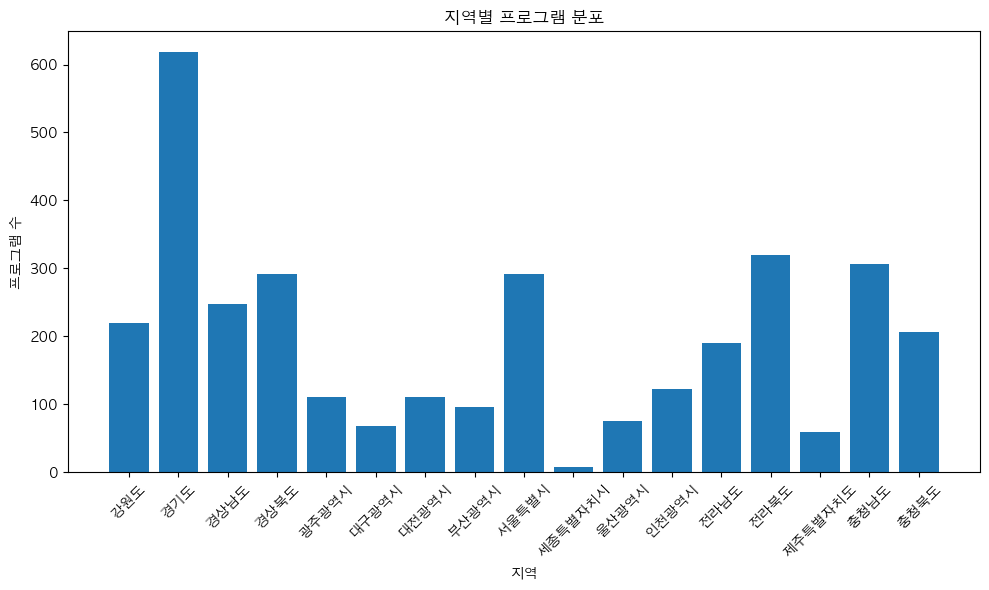

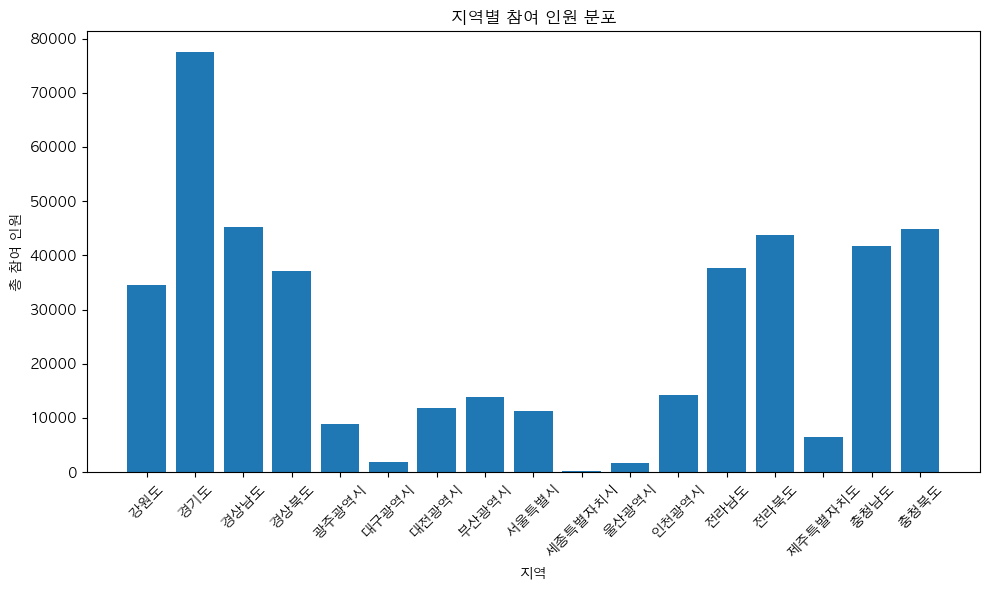

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 지역별 프로그램 개수 및 참여 인원 집계
region_program_count = data.groupby('AREA_NM')['PROGRM_NM'].count().reset_index(name='Program_Count')
region_target_sum = data.groupby('AREA_NM')['총 참여 인원'].sum().reset_index(name='Total_Target')

# 지역별 데이터 병합
region_analysis = pd.merge(region_program_count, region_target_sum, on='AREA_NM')

# 데이터 수치 출력
print("지역별 프로그램 분포:")
print(region_program_count)

# 데이터 수치 출력
print("지역별 참여 인원 분포:")
print(region_target_sum)

# 2. 막대 그래프 시각화: 프로그램 수
plt.figure(figsize=(10, 6))
plt.bar(region_analysis['AREA_NM'], region_analysis['Program_Count'])
plt.title('지역별 프로그램 분포')
plt.xlabel('지역')
plt.ylabel('프로그램 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 막대 그래프 시각화: 참여 인원
plt.figure(figsize=(10, 6))
plt.bar(region_analysis['AREA_NM'], region_analysis['Total_Target'])
plt.title('지역별 참여 인원 분포')
plt.xlabel('지역')
plt.ylabel('총 참여 인원')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. 지역별 프로그램 개수 및 참여 인원 비율로 파이차트

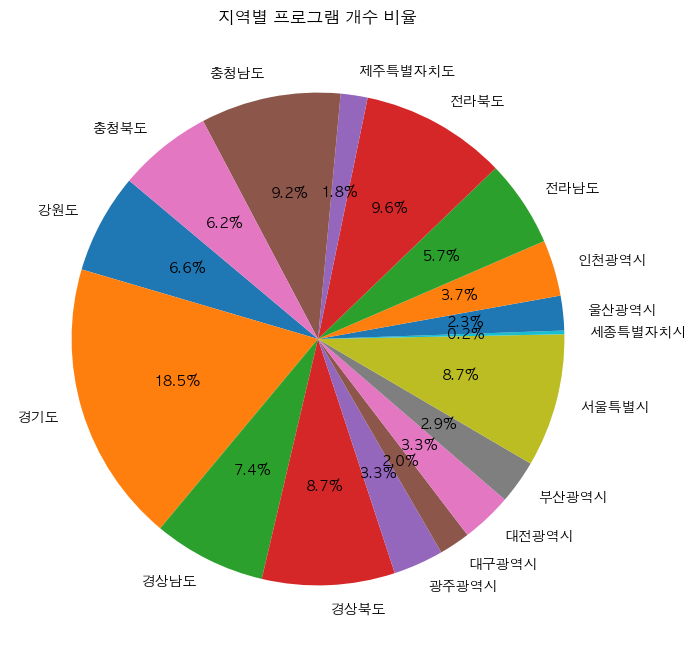

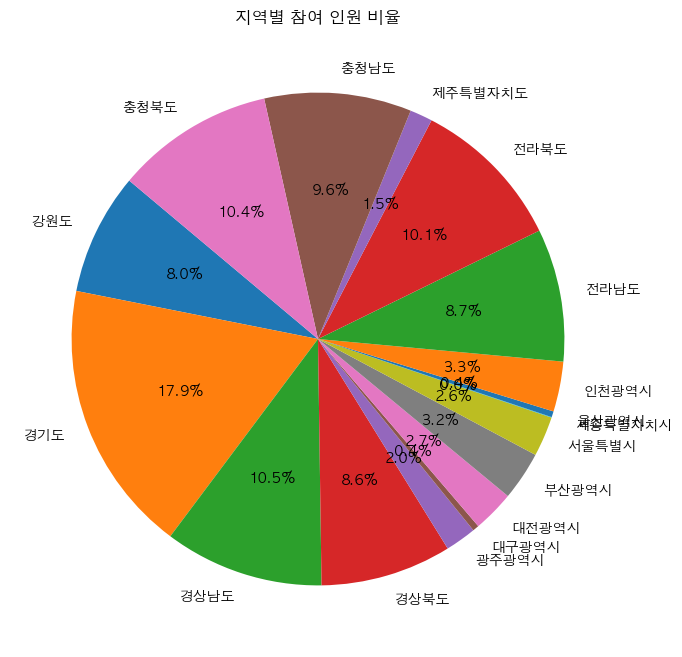

    AREA_NM  Participant_Percentage
0       강원도                7.985878
1       경기도               17.897989
2      경상남도               10.456917
3      경상북도                8.593530
4     광주광역시                2.035285
5     대구광역시                0.412186
6     대전광역시                2.731658
7     부산광역시                3.206227
8     서울특별시                2.624222
9   세종특별자치시                0.033502
10    울산광역시                0.385616
11    인천광역시                3.282934
12     전라남도                8.712981
13     전라북도               10.130449
14  제주특별자치도                1.484702
15     충청남도                9.645252
16     충청북도               10.380672


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 지역별 프로그램 개수 및 참여 인원 집계
region_program_count = data.groupby('AREA_NM')['PROGRM_NM'].count().reset_index(name='Program_Count')
region_participant_sum = data.groupby('AREA_NM')['총 참여 인원'].sum().reset_index(name='Total_Participants')

# 지역별 데이터 병합
region_analysis = pd.merge(region_program_count, region_participant_sum, on='AREA_NM')

# 2. 전체 대비 비율 계산
region_analysis['Program_Percentage'] = (region_analysis['Program_Count'] / region_analysis['Program_Count'].sum()) * 100
region_analysis['Participant_Percentage'] = (region_analysis['Total_Participants'] / region_analysis['Total_Participants'].sum()) * 100

# 3. 프로그램 개수 비율 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(region_analysis['Program_Percentage'], labels=region_analysis['AREA_NM'], autopct='%1.1f%%', startangle=140)
plt.title('지역별 프로그램 개수 비율')
plt.show()

# 4. 참여 인원 비율 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(region_analysis['Participant_Percentage'], labels=region_analysis['AREA_NM'], autopct='%1.1f%%', startangle=140)
plt.title('지역별 참여 인원 비율')
plt.show()

# 분석 데이터 출력

# 특정 컬럼만 출력
print(region_analysis[['AREA_NM', 'Participant_Percentage']])



# 2. 프로그램 연령층 분포 분석
- 연령대별(FULL_AGE9_12_TRGET_NMPR_CN 등) 프로그램 수와 대상자 수 집계 및 비교. 
- 특정 연령대에 집중된 프로그램이 있는지 확인.
- 여러 연령층을 포괄하는 프로그램 비율을 분석(예: 모든 연령층이 참여 가능한 프로그램).

- 결과 활용: 특정 연령대가 소외되었거나, 지나치게 많은 자원을 집중하는 문제를 식별. 연령대별 맞춤형 활성화 방안 제안. ?

   Age_Group  Total_Participants
0   AGE_9_12              136450
1  AGE_13_15              165485
2  AGE_16_18              128048
3  AGE_19_24                 690
4    AGE_ETC                2141


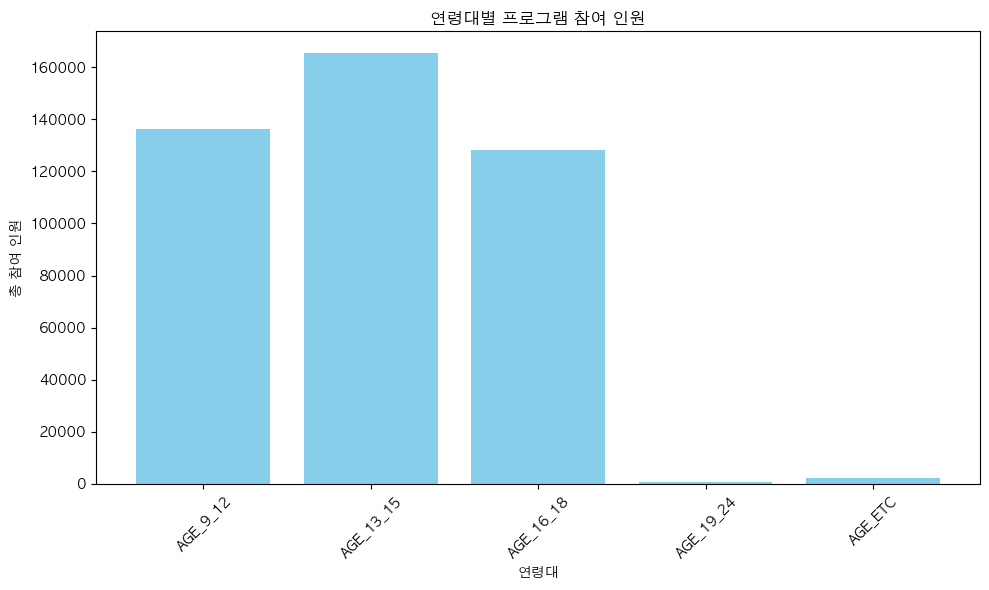

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 연령대별 총 참여 인원 계산
age_columns = [
    'AGE_9_12',
    'AGE_13_15',
    'AGE_16_18',
    'AGE_19_24',
    'AGE_ETC'
]

age_totals = data[age_columns].sum().reset_index(name='Total_Participants')
age_totals.columns = ['Age_Group', 'Total_Participants']

print (age_totals[['Age_Group','Total_Participants']])

# 3. 연령대별 총 참여 인원 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
plt.bar(age_totals['Age_Group'], age_totals['Total_Participants'], color='skyblue')
plt.title('연령대별 프로그램 참여 인원')
plt.xlabel('연령대')
plt.ylabel('총 참여 인원')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 3. 안전 고려 여부 분석
- SAFE_CNSDR_ACT_AT(안전 고려 여부) 데이터를 사용해, 안전 고려된 프로그램 비율을 분석.
- 지역별, 연령대별로 안전 고려 여부를 비교하여 안전성이 취약한 프로그램 파악.
- 결과 활용: 안전성 보강 및 지역 간 안전 고려 활동 격차 해소 방안 제안.

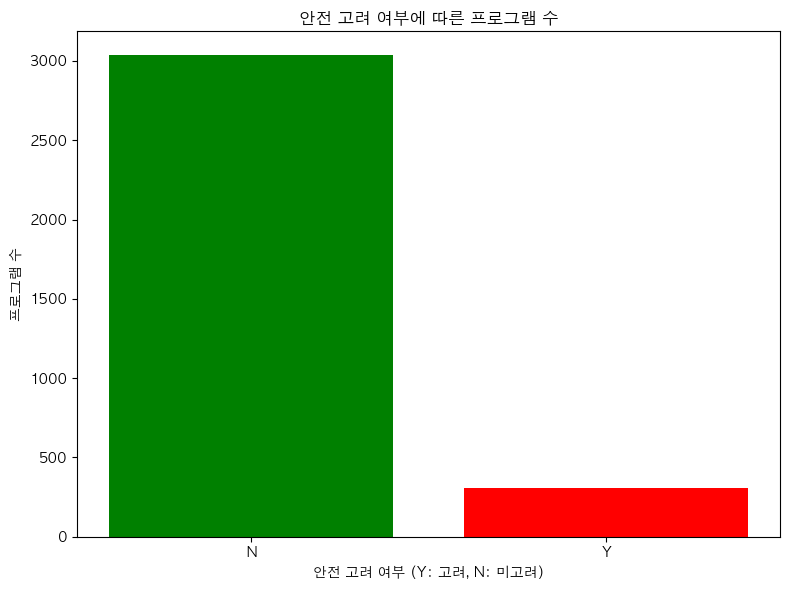

  Safety_Consideration  Program_Count  Percentage
0                    N           3035   90.841066
1                    Y            306    9.158934


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 안전 고려 여부별 프로그램 수 집계
safety_analysis = data['SAFE_CNSDR_ACT_AT'].value_counts().reset_index()
safety_analysis.columns = ['Safety_Consideration', 'Program_Count']

# 2. 안전 고려 여부 비율 계산
safety_analysis['Percentage'] = (safety_analysis['Program_Count'] / safety_analysis['Program_Count'].sum()) * 100

# 3. 안전 고려 여부 시각화 (막대 그래프)
plt.figure(figsize=(8, 6))
plt.bar(safety_analysis['Safety_Consideration'], safety_analysis['Program_Count'], color=['green', 'red'])
plt.title('안전 고려 여부에 따른 프로그램 수')
plt.xlabel('안전 고려 여부 (Y: 고려, N: 미고려)')
plt.ylabel('프로그램 수')
plt.tight_layout()
plt.show()

# 안전 고려 여부 분석 데이터 출력
print(safety_analysis)


# 4. 운영 기관별 프로그램 특성
- INSTT_NM을 기준으로 운영 기관별 프로그램 개수 및 특성(참여 가능 인원, 연령대 등)을 분석.
- 특정 기관에 프로그램이 과도하게 집중되거나, 소외된 기관이 있는지 확인.
- 결과 활용: 기관 간 자원 분배를 효율화하거나, 지방 소규모 기관 지원을 제안.

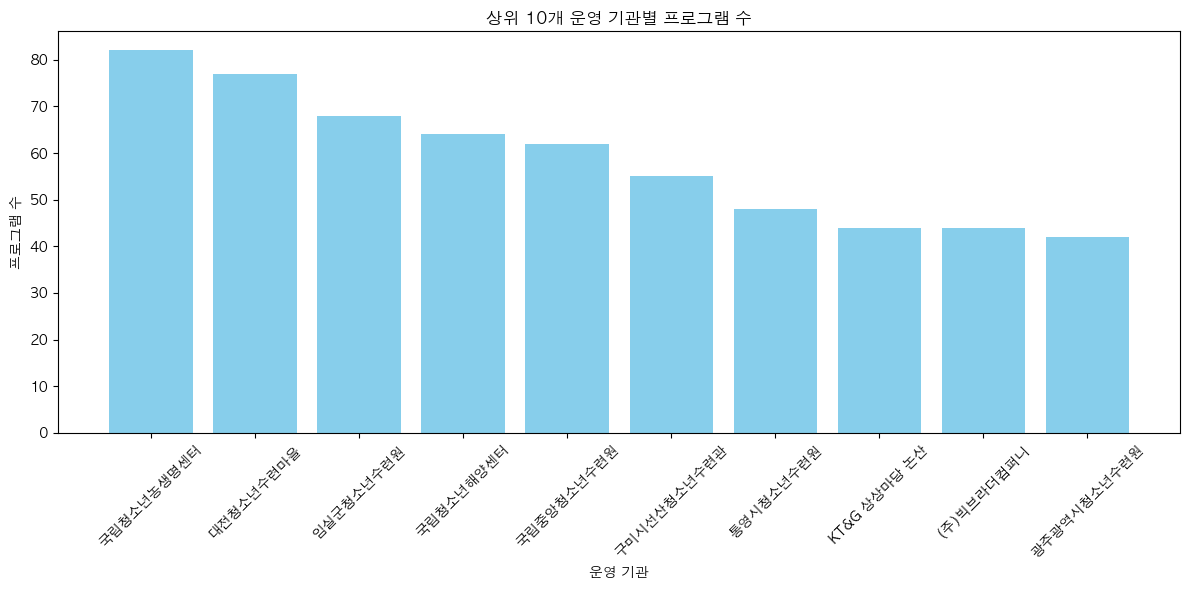

    Institution  Program_Count
0    국립청소년농생명센터             82
1     대전청소년수련마을             77
2     임실군청소년수련원             68
3     국립청소년해양센터             64
4    국립중앙청소년수련원             62
5   구미시선산청소년수련관             55
6     통영시청소년수련원             48
7  KT&G 상상마당 논산             44
8    (주)빅브라더컴퍼니             44
9   광주광역시청소년수련원             42


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 운영 기관별 프로그램 개수 집계
institution_analysis = data['INSTT_NM'].value_counts().reset_index()
institution_analysis.columns = ['Institution', 'Program_Count']

# 2. 상위 10개 기관 데이터 추출 (많은 프로그램을 운영하는 기관 기준)
top_institutions = institution_analysis.head(10)

# 3. 운영 기관별 프로그램 수 시각화 (상위 10개 기관)
plt.figure(figsize=(12, 6))
plt.bar(top_institutions['Institution'], top_institutions['Program_Count'], color='skyblue')
plt.title('상위 10개 운영 기관별 프로그램 수')
plt.xlabel('운영 기관')
plt.ylabel('프로그램 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 전체 운영 기관 분석 데이터 출력
print(institution_analysis.head(10))


------

# 5. 연도별 프로그램 수, 지역별 프로그램 수 

연도별 프로그램 분포:
    Year  Program_Count
0   2007              1
1   2008              1
2   2009              1
3   2012              2
4   2013              4
5   2014              2
6   2015              4
7   2016             26
8   2017            190
9   2018            871
10  2019            823
11  2020            970
12  2021            446


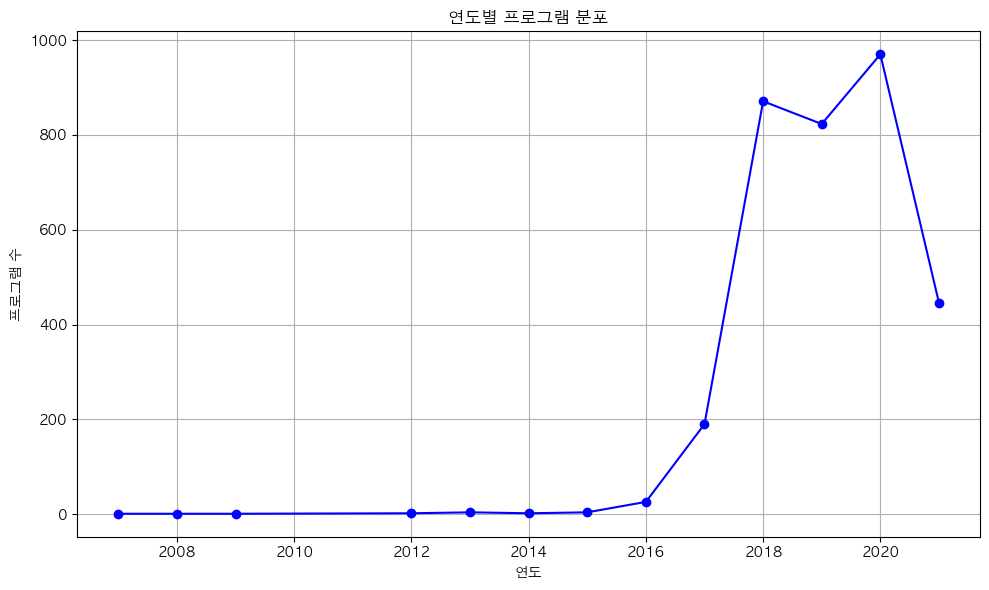

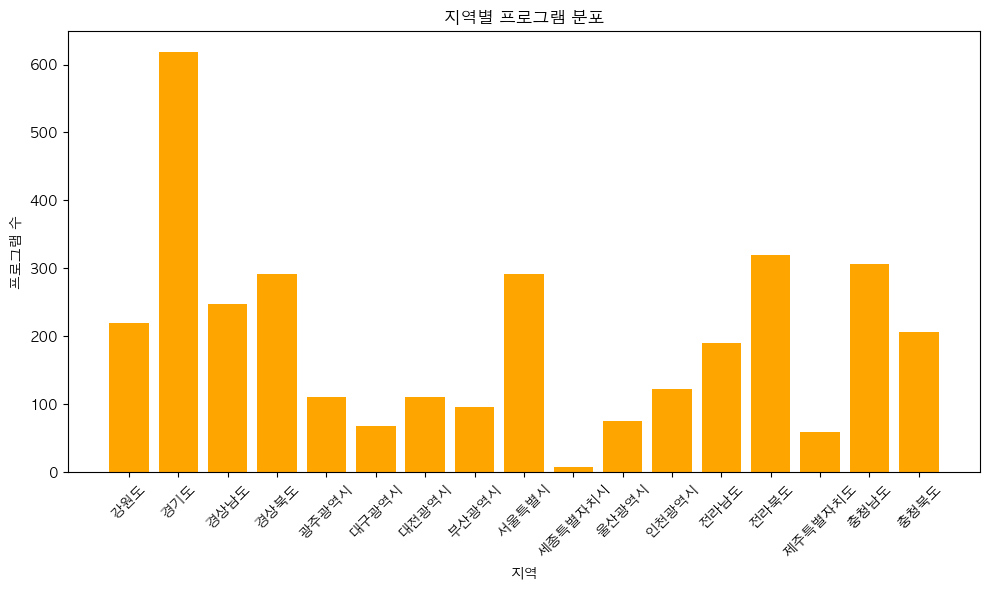

In [30]:
# 연도별, 지역별, 연령별 프로그램 분포
data['Year'] = pd.to_datetime(data['VALID_PD_BEGIN_DE'], format='%Y%m%d').dt.year

# 연도별 프로그램 수
yearly_programs = data.groupby('Year')['PROGRM_NM'].count().reset_index()
yearly_programs.columns = ['Year', 'Program_Count']
# 연도별 프로그램 수 출력
print("연도별 프로그램 분포:")
print(yearly_programs)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_programs['Year'], yearly_programs['Program_Count'], marker='o', color='blue')
plt.title('연도별 프로그램 분포')
plt.xlabel('연도')
plt.ylabel('프로그램 수')
plt.grid(True)
plt.tight_layout()
plt.show()

# 지역별 프로그램 수
region_programs = data.groupby('AREA_NM')['PROGRM_NM'].count().reset_index()
region_programs.columns = ['Region', 'Program_Count']

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(region_programs['Region'], region_programs['Program_Count'], color='orange')
plt.title('지역별 프로그램 분포')
plt.xlabel('지역')
plt.ylabel('프로그램 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. 지역별 연령대 프로그램 히트맵

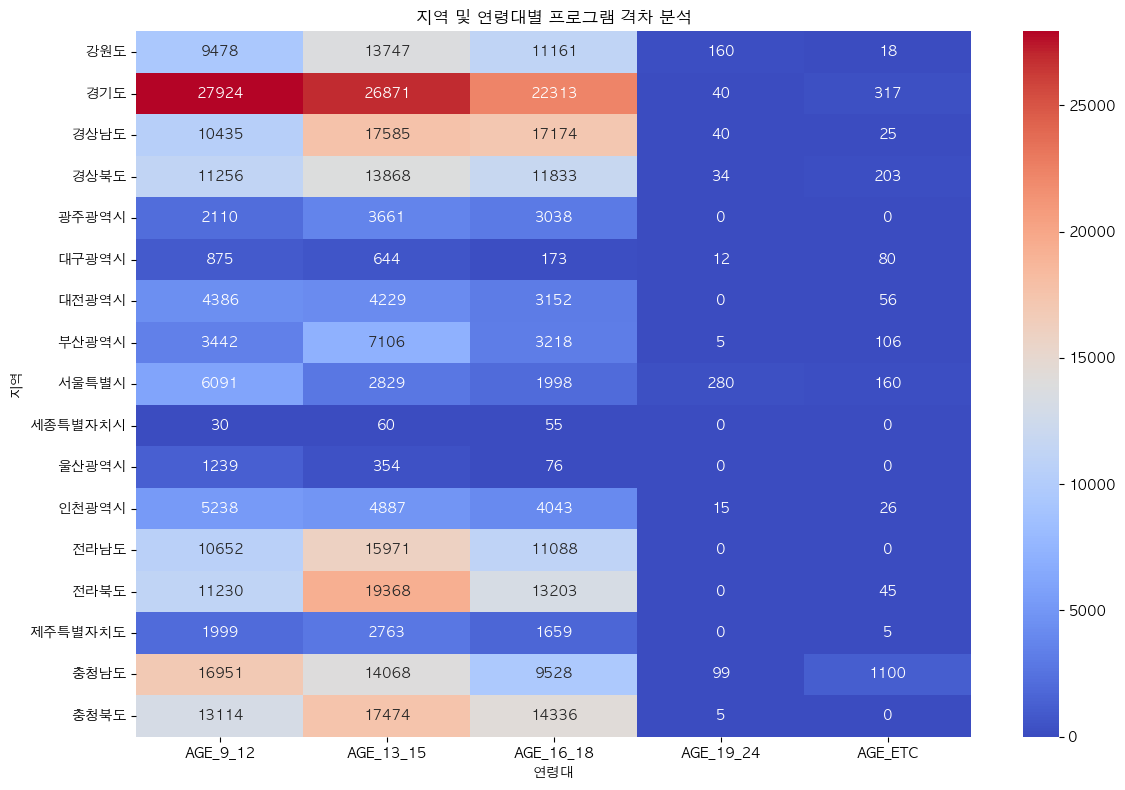

         AGE_9_12  AGE_13_15  AGE_16_18  AGE_19_24  AGE_ETC
AREA_NM                                                    
강원도          9478      13747      11161        160       18
경기도         27924      26871      22313         40      317
경상남도        10435      17585      17174         40       25
경상북도        11256      13868      11833         34      203
광주광역시        2110       3661       3038          0        0
대구광역시         875        644        173         12       80
대전광역시        4386       4229       3152          0       56
부산광역시        3442       7106       3218          5      106
서울특별시        6091       2829       1998        280      160
세종특별자치시        30         60         55          0        0
울산광역시        1239        354         76          0        0
인천광역시        5238       4887       4043         15       26
전라남도        10652      15971      11088          0        0
전라북도        11230      19368      13203          0       45
제주특별자치도      1999       2763       1659 

In [ ]:
import seaborn as sns
import numpy as np

# 지역별 연령대 프로그램 합계 데이터 준비
region_age_programs = data.groupby('AREA_NM')[age_columns].sum()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(region_age_programs, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('지역 및 연령대별 프로그램 격차 분석')
plt.xlabel('연령대')
plt.ylabel('지역')
plt.tight_layout()
plt.show()

# 데이터 출력
print(region_age_programs)
